In [24]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
# Import data
obs_A = pd.read_parquet('data/obs_A.parquet')
est_A = pd.read_parquet('data/est_A.parquet')
obs_B = pd.read_parquet('data/obs_B.parquet')
est_B = pd.read_parquet('data/est_B.parquet')
obs_C = pd.read_parquet('data/obs_C.parquet')
est_C = pd.read_parquet('data/est_C.parquet')

# Set 'date_forecast' as the index
# obs_A = obs_A.set_index('date_forecast')
# est_A = est_A.set_index('date_forecast')
# obs_B = obs_B.set_index('date_forecast')
# est_B = est_B.set_index('date_forecast')
# obs_C = obs_C.set_index('date_forecast')
# est_C = est_C.set_index('date_forecast')

# Concatenate data
A = pd.concat([obs_A, est_A], axis=1)
B = pd.concat([obs_B, est_B], axis=1)
C = pd.concat([obs_C, est_C], axis=1)


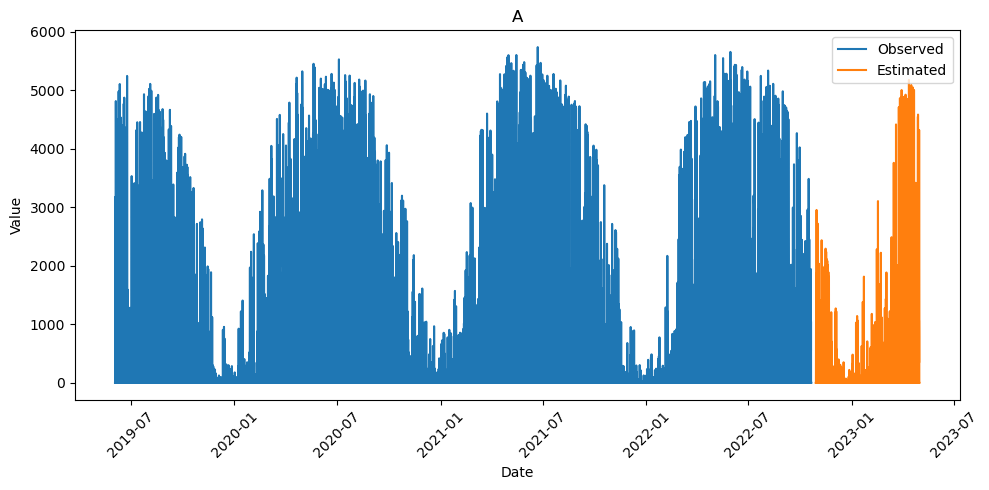

In [16]:
# Location A

plt.figure(figsize=(10, 5))

plt.plot(obs_A['pv_measurement'], label='Observed')
plt.plot(est_A['pv_measurement'], label='Estimated')

plt.title('A')
plt.xlabel('Date')  # Setting label for x-axis
plt.ylabel('Value')  # Setting label for y-axis; replace 'Value' with what's actually being measured
plt.legend()
plt.xticks(rotation=45)  # It's useful to rotate the dates for better readability
plt.tight_layout()  # This will ensure everything fits well
plt.show()


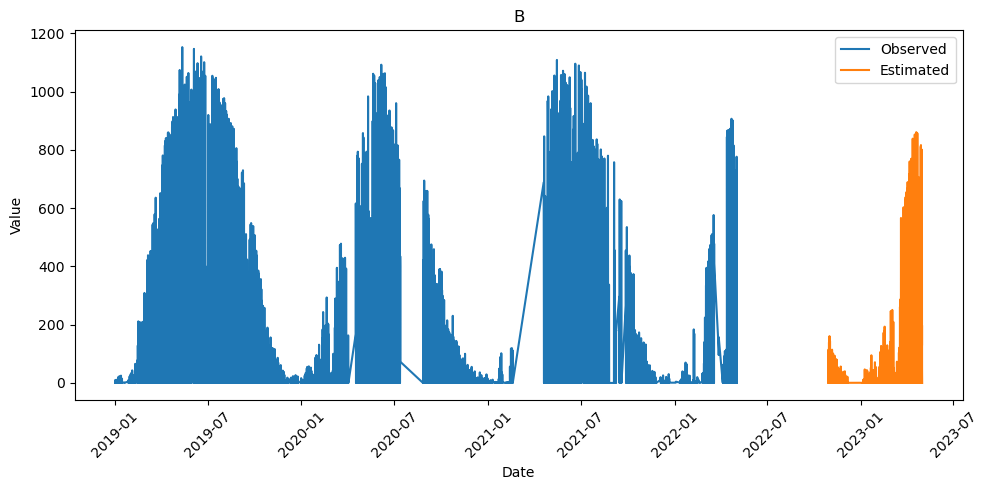

In [17]:
# Location B

plt.figure(figsize=(10, 5))

plt.plot(obs_B['pv_measurement'], label='Observed')
plt.plot(est_B['pv_measurement'], label='Estimated')

plt.title('B')
plt.xlabel('Date')  # Setting label for x-axis
plt.ylabel('Value')  # Setting label for y-axis; replace 'Value' with what's actually being measured
plt.legend()
plt.xticks(rotation=45)  # It's useful to rotate the dates for better readability
plt.tight_layout()  # This will ensure everything fits well
plt.show()


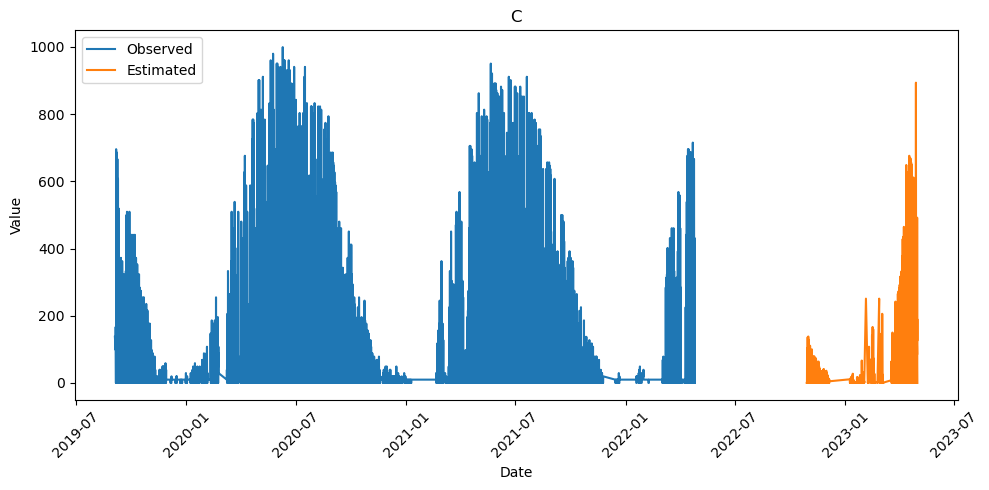

In [18]:
# Location C

plt.figure(figsize=(10, 5))

plt.plot(obs_C['pv_measurement'], label='Observed')
plt.plot(est_C['pv_measurement'], label='Estimated')

plt.title('C')
plt.xlabel('Date')  # Setting label for x-axis
plt.ylabel('Value')  # Setting label for y-axis; replace 'Value' with what's actually being measured
plt.legend()
plt.xticks(rotation=45)  # It's useful to rotate the dates for better readability
plt.tight_layout()  # This will ensure everything fits well
plt.show()


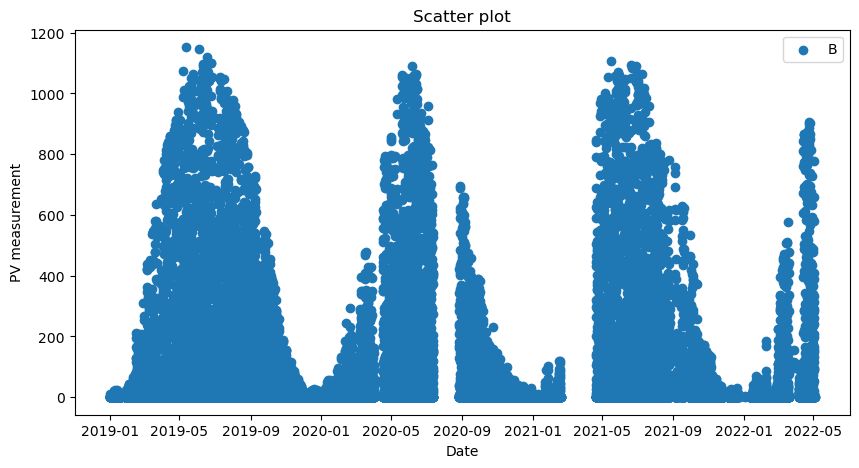

In [27]:
# Scatter plot

plt.figure(figsize=(10, 5))

plt.scatter(obs_B['date_forecast'], obs_B['pv_measurement'], label='B')

plt.title('Scatter plot')
plt.xlabel('Date')
plt.ylabel('PV measurement')
plt.legend()

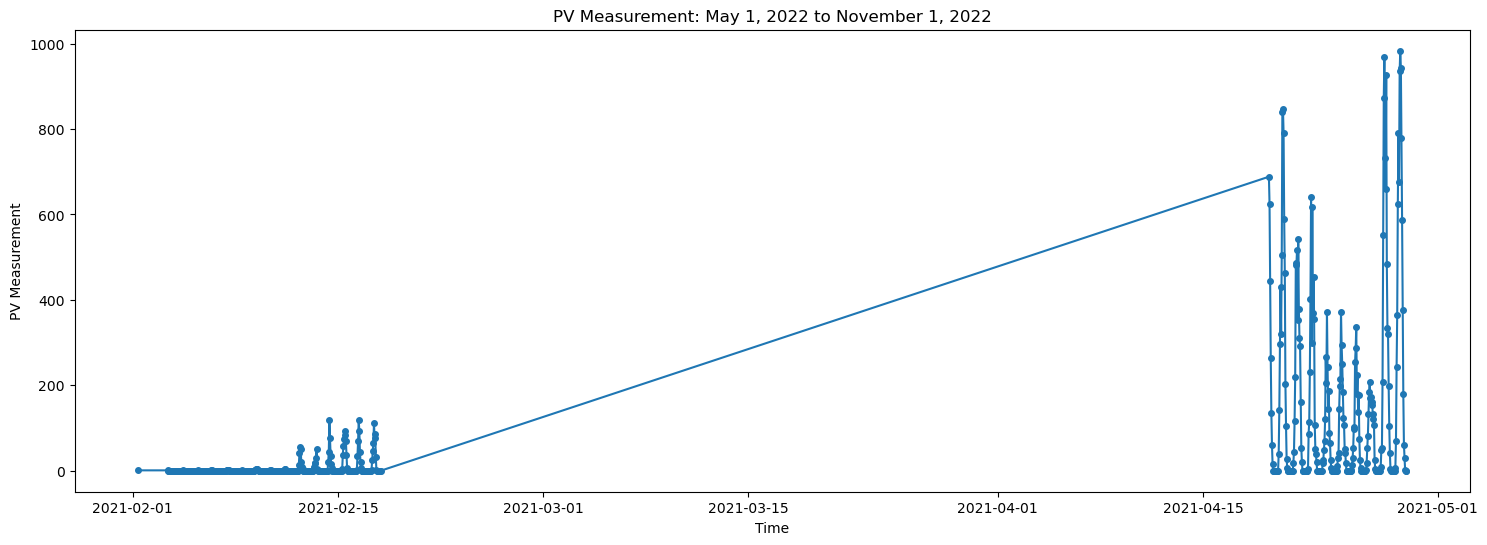

In [32]:
start_date = '2021-02-01'
end_date = '2021-05-01'
filtered_df = obs_B[(obs_B['date_forecast'] >= start_date) & (obs_B['date_forecast'] <= end_date)]

# Plotting the filtered data
plt.figure(figsize=(18, 6))
plt.plot(filtered_df['date_forecast'], filtered_df['pv_measurement'], marker='o', markersize=4, linestyle='-')
plt.title('PV Measurement: May 1, 2022 to November 1, 2022')
plt.xlabel('Time')
plt.ylabel('PV Measurement')
plt.show()